## Imports 

In [364]:
import sklearn as sk
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

# Task 1

## Task 1.A:

On this task, I will perform EDA on the two wine datasets provided, which includeds computing summary statistics and plotting of the data.  

In [365]:
# Load the dataset from csv files
red_wine= pd.read_csv(filepath_or_buffer='winequality-red.csv', header=0, sep=';')
white_wine= pd.read_csv(filepath_or_buffer='winequality-white.csv', header=0, sep=';')

Firstly, to explore the data, I performed a description of the wine's quality distribution, for both sets:

In [366]:
# Describe the red wine samples in terms of quality
print("🔴Red Wine's Quality:")
display(red_wine["quality"].describe())

# Describe the white wine samples in terms of quality
print("⚪White Wine's Quality:")
display(white_wine["quality"].describe())

🔴Red Wine's Quality:


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

⚪White Wine's Quality:


count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

This distribution can be analysed furtherly when illustrated as a `countplot`:

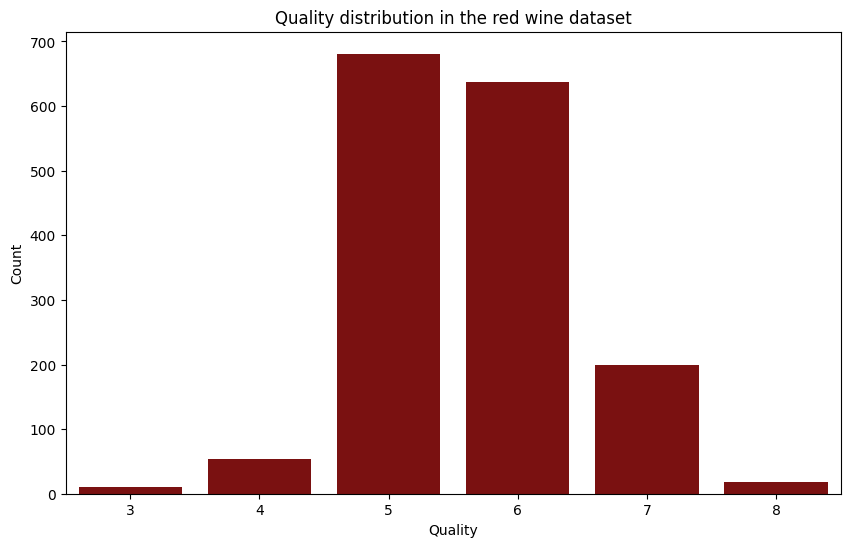

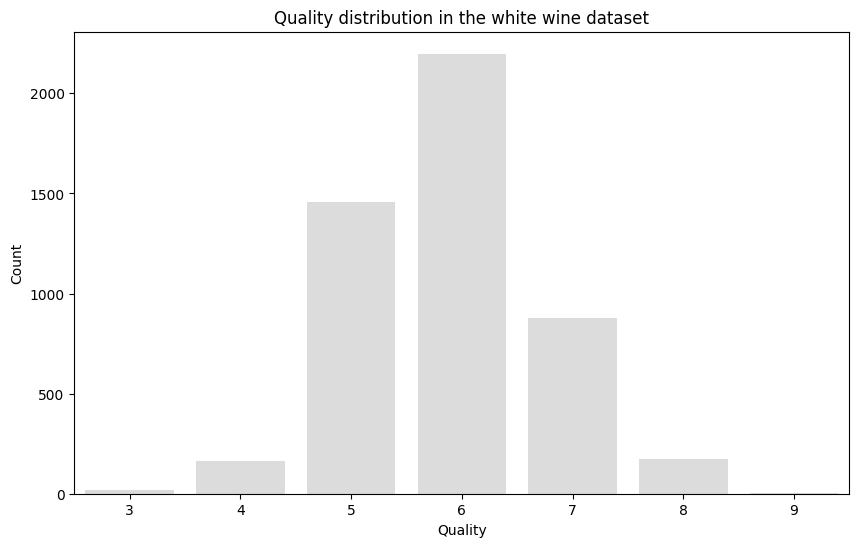

In [367]:
# Plotting the distribution of quality in the red wine dataset
plt.figure(figsize = (10, 6))
sns.countplot(x ="quality",data=red_wine, color="darkred")
plt.title("Quality distribution in the red wine dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

# Plotting the distribution of quality in the white wine dataset
plt.figure(figsize = (10, 6))
sns.countplot(x ="quality",data=white_wine, color="gainsboro")
plt.title("Quality distribution in the white wine dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

## Task 1.B:

To understand the correlations in `quality` with the other features, I discretised the alcohol content per sample into a new variable called `alcohol_cat` and added it as a column to the sets'.

This will allow us to much easily analyze the correlation between `quality` and `alcohol` in the samples:

In [368]:
# Discretise alcohol contents by creating a new column 'alcohol_cat' in the red wine dataset
red_wine['alcohol_cat'] = ['low' if x < red_wine['alcohol'].mean()-red_wine['alcohol'].std() 
                           else 'mid' if red_wine['alcohol'].mean()-red_wine['alcohol'].std() < x < red_wine['alcohol'].mean()+red_wine['alcohol'].std() 
                           else 'high' for x in red_wine['alcohol']]

# Discretise alcohol contents by creating a new column 'alcohol_cat' in the white wine dataset
white_wine['alcohol_cat'] = ['low' if x < white_wine['alcohol'].mean()-white_wine['alcohol'].std() 
                           else 'mid' if white_wine['alcohol'].mean()-white_wine['alcohol'].std() < x < white_wine['alcohol'].mean()+white_wine['alcohol'].std() 
                           else 'high' for x in white_wine['alcohol']]

### Task 1.C:

Now that `alcohol_cat` has been added, we can describe and create plots to draw conclusions on the relationship between alcohol content and quality:

In [369]:
# Describe the quality of red wines based on alcohol categories
print("🔴Red Wine's Alcohol Categories:\n")

for category in red_wine["alcohol_cat"].unique():
    red_wine_subset = red_wine[red_wine["alcohol_cat"] == category]
    print(f"🔴Category: {category}")
    display(red_wine_subset["quality"].describe())
    
# Describe the quality of white wines based on alcohol categories
print("\n⚪White Wine's Alcohol Categories:\n")

for category in white_wine["alcohol_cat"].unique():
    white_wine_subset = white_wine[white_wine["alcohol_cat"] == category]
    print(f"⚪Category: {category}")
    display(white_wine_subset["quality"].describe())

🔴Red Wine's Alcohol Categories:

🔴Category: mid


count    1125.000000
mean        5.526222
std         0.746568
min         3.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

🔴Category: low


count    194.000000
mean       5.247423
std        0.611308
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: quality, dtype: float64

🔴Category: high


count    280.000000
mean       6.346429
std        0.755853
min        4.000000
25%        6.000000
50%        6.000000
75%        7.000000
max        8.000000
Name: quality, dtype: float64


⚪White Wine's Alcohol Categories:

⚪Category: low


count    845.000000
mean       5.547929
std        0.814057
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

⚪Category: mid


count    3121.000000
mean        5.766741
std         0.821620
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

⚪Category: high


count    932.000000
mean       6.549356
std        0.819165
min        3.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: quality, dtype: float64

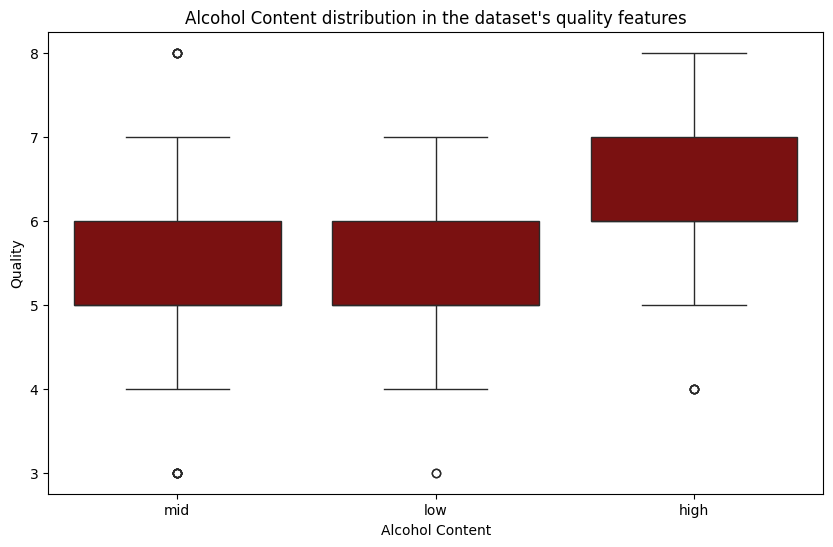

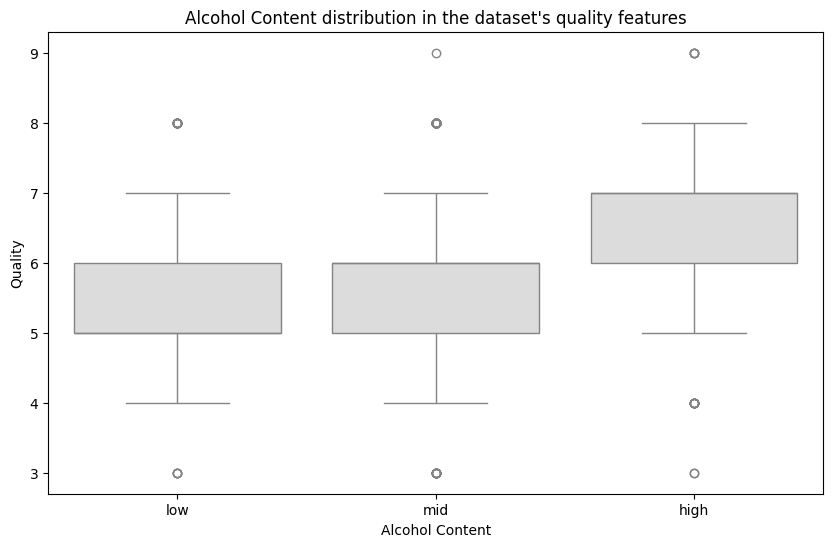

In [370]:
# Plotting the distribution of alcohol content in red wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=red_wine["alcohol_cat"], y=red_wine["quality"], color="darkred")
plt.title("Alcohol Content distribution in the dataset's quality features")
plt.xlabel("Alcohol Content")
plt.ylabel("Quality")
plt.show()
plt.close()

# Plotting the distribution of alcohol content in white wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=white_wine["alcohol_cat"], y=white_wine["quality"], color="gainsboro")
plt.title("Alcohol Content distribution in the dataset's quality features")
plt.xlabel("Alcohol Content")
plt.ylabel("Quality")
plt.show()
plt.close()

As it appears on the `alcohol_cat` descriptions and graphs, wines with higher alcohol content usually have a higher quality feature than the samples with lower alcohol content. 

This can be seen on the boxplots where the `high` category boxes are placed higher than the rest. Although there are outliers from the `low` and `mid` categories that also achieve high quality scores, these are still very rare, and are not as consistent as the whiskers and dots from the `high` category.

## Task 1.D

The feature `residual sugar` demonstrates the amount of sugar(g) per litre in the wine datasets. The graph below shows the first 50 data points for each type of wine:

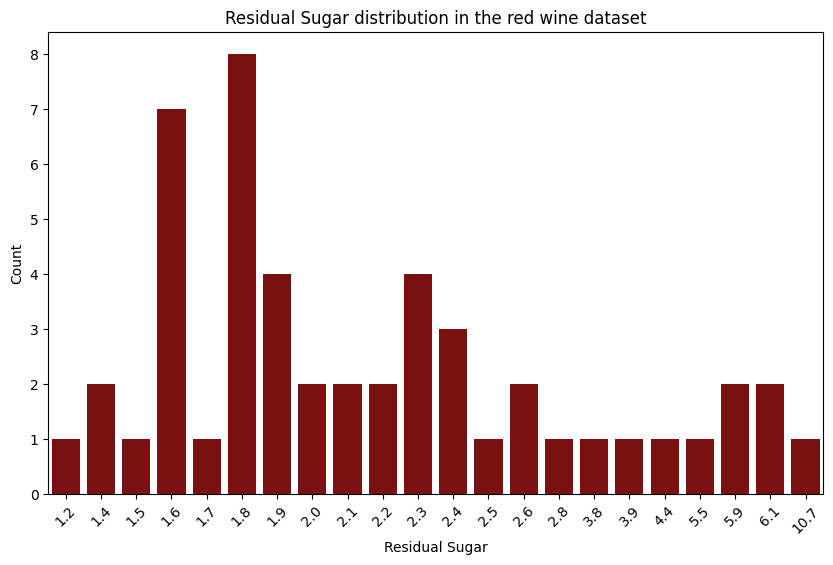

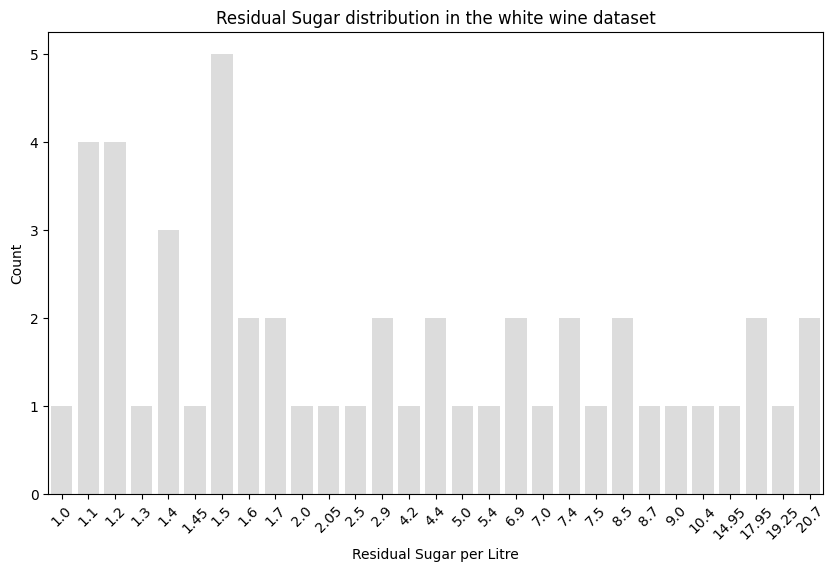

In [371]:
# Plotting the distribution of residual sugar in red wine samples
plt.figure(figsize = (10, 6))
sns.countplot(x ="residual sugar",data=red_wine.head(50), color="darkred")
plt.title("Residual Sugar distribution in the red wine dataset")
plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.tick_params(axis='x', rotation=45)
plt.show()
plt.close()

# Plotting the distribution of residual sugar in white wine samples
plt.figure(figsize = (10, 6))
sns.countplot(x ="residual sugar",data=white_wine.head(50), color="gainsboro")
plt.title("Residual Sugar distribution in the white wine dataset")
plt.xlabel("Residual Sugar per Litre")
plt.ylabel("Count")
plt.tick_params(axis='x', rotation=45)
plt.show()
plt.close()

Although most wines here are dry according to wine folly's definition (https://winefolly.com/deep-dive/sugar-in-wine-chart/), in this task I have split the records as evenly as possibly between `sweet` and `dry`: 

In [372]:
# Discretise residual sugar contents by creating a new column 'isSweet' in both datasets
red_wine["isSweet"] = ['dry' if x < 2.11 else 'sweet' for x in red_wine["residual sugar"]]
white_wine["isSweet"] = ['dry' if x < 5.2 else 'sweet' for x in white_wine["residual sugar"]]


# Count the number of sweet and dry red wines
sweet=0
dry=0

for i in range(len(red_wine["isSweet"])):
    if red_wine["isSweet"][i] == 'sweet':
        sweet+=1
    else:
        dry+=1
print(f"🔴Red Wine's Residual Sugar: \nSweet={sweet}"+"\n"+f"Dry={dry}\n")


# Count the number of sweet and dry white wines
sweet=0
dry=0

for i in range(len(white_wine["isSweet"])):
    if white_wine["isSweet"][i] == 'sweet':
        sweet+=1
    else:
        dry+=1
print(f"⚪White Wine's  Residual Sugar: \nSweet={sweet}"+"\n"+f"Dry={dry}")

🔴Red Wine's Residual Sugar: 
Sweet=849
Dry=750

⚪White Wine's  Residual Sugar: 
Sweet=2458
Dry=2440


## Task 1.E

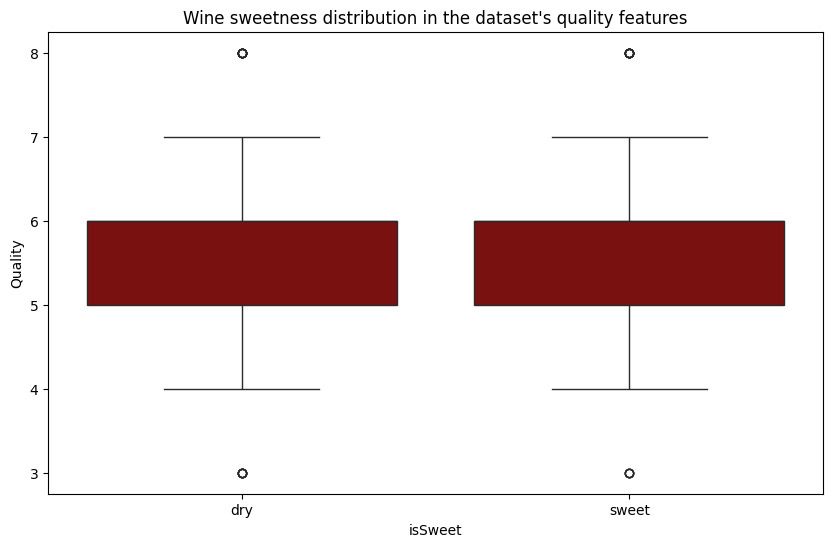

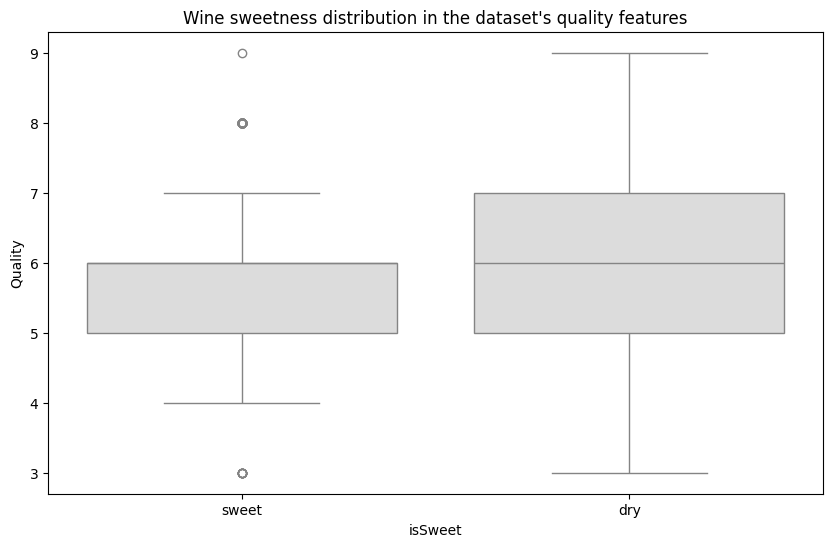

In [373]:
# Plotting the distribution of wine sweetness in red wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=red_wine["isSweet"], y=red_wine["quality"], color="darkred")
plt.title("Wine sweetness distribution in the dataset's quality features")
plt.ylabel("Quality")
plt.show()
plt.close()

# Plotting the distribution of wine sweetness in white wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=white_wine["isSweet"], y=white_wine["quality"], color="gainsboro")
plt.title("Wine sweetness distribution in the dataset's quality features")
plt.ylabel("Quality")
plt.show()
plt.close()

For red wine samples, the quality seems to be perceived as the same for both sweet and dry wines, having 50% of the data points between 5 to 6 in quality scores. 

However, for white wines samples, the quality perceived for drier wines is much higher than the sweeter samples. This can be seen in the boxplot, where 50% of dry samples hover quality scores from 5 to 7, while having consistent outliers up to 9.

The quality for dry white wine samples is also perceived lower than the sweeter samples, due to having outliers reaching a score of 3 in quality.


# Task 2




##### Determining subsets for machine learning:

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


🔴Red Wine's fixed acidity Correlation with Quality:
0.1240516491132243
🔴Red Wine's volatile acidity Correlation with Quality:
-0.39055778026400734
🔴Red Wine's citric acid Correlation with Quality:
0.22637251431804142
🔴Red Wine's residual sugar Correlation with Quality:
0.013731637340066277
🔴Red Wine's chlorides Correlation with Quality:
-0.12890655993005273
🔴Red Wine's free sulfur dioxide Correlation with Quality:
-0.05065605724427633
🔴Red Wine's total sulfur dioxide Correlation with Quality:
-0.18510028892653785
🔴Red Wine's density Correlation with Quality:
-0.17491922778334884
🔴Red Wine's pH Correlation with Quality:
-0.05773139120538215
🔴Red Wine's sulphates Correlation with Quality:
0.2513970790692614
🔴Red Wine's alcohol Correlation with Quality:
0.4761663240011362
⚪White Wine's fixed acidity Correlation with Quality:
-0.11366283071301796
⚪White Wine's volatile acidity Correlation with Quality:
-0.19472296892113428
⚪White Wine's citric acid Correlation with Quality:
-0.009209090883

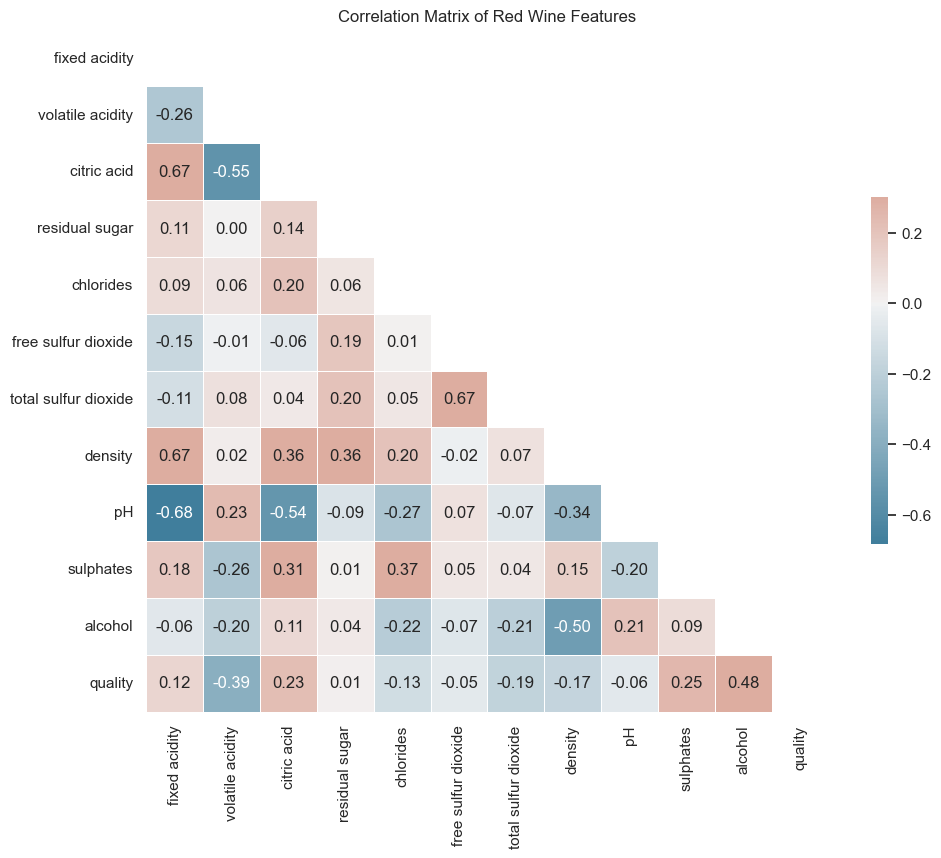

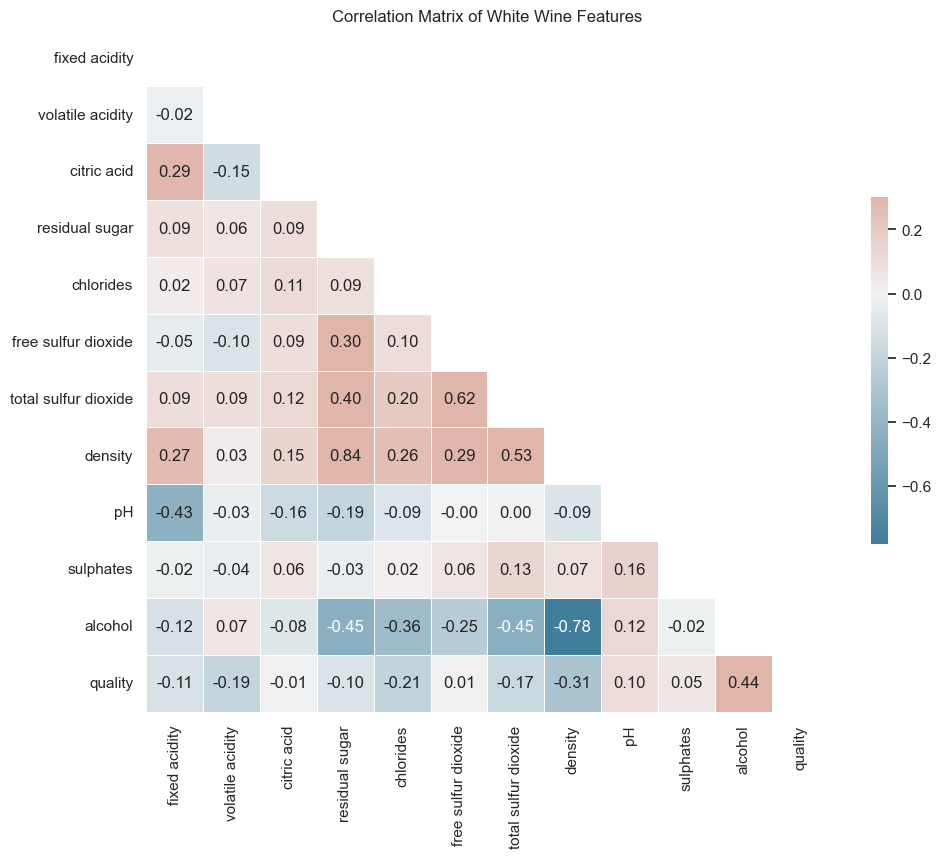

In [392]:
display(red_wine.describe())

# Correlation of features with quality in red wine dataset as text
for i in red_wine.columns:
    if i != "quality" and i != "alcohol_cat" and i != "isSweet":
        print(f"🔴Red Wine's {i} Correlation with Quality:")
        print(red_wine[str(i)].corr(red_wine["quality"], method='pearson'))

# Correlation of features with quality in white wine dataset as text
for i in white_wine.columns:
    if i != "quality" and i != "alcohol_cat" and i != "isSweet":
        print(f"⚪White Wine's {i} Correlation with Quality:")
        print(white_wine[str(i)].corr(white_wine["quality"]))
        
# Create subsets of float features for correlation analysis
red_wine_subset = red_wine[["fixed acidity",	"volatile acidity", "citric acid", 
                           "residual sugar", "chlorides", "free sulfur dioxide", 
                           "total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"]]
white_wine_subset = white_wine[["fixed acidity",	"volatile acidity", "citric acid", 
                           "residual sugar", "chlorides", "free sulfur dioxide", 
                           "total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"]]

# Calculate the correlation matrix for the red wine subset
red_wine_corr = red_wine_subset.corr()

mask = np.triu(np.ones_like(red_wine_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(red_wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Red Wine Features")
plt.show()


# Calculate the correlation matrix for the white wine subset
white_wine_corr = white_wine_subset.corr()

plt.figure(figsize=(11, 9))
mask = np.triu(np.ones_like(white_wine_corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(white_wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of White Wine Features")
plt.show()

From the given correlation matrixes, we are able to see which variales affect the `quality` feature the most:

🔴Red Wine:

Most Positive Correlations: **Alcohol**, **Sulphates**, **Citric Acid**, **Fixed Acidity**

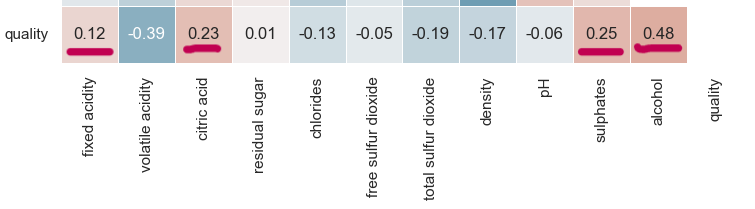

<br> 

⚪White Wine:

Most Positive Correlations: **Alcohol**, **pH**

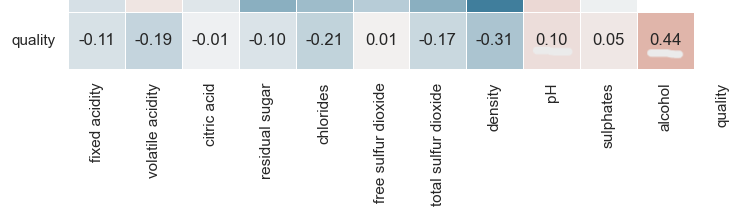


Although quite there were quite a few negative correlations, specially in the White wine samples, they could still increase wine's quality by reducing their amount.


# Task 3